# ML Lab Week 6 By Smeet 200968236
## Excercise 1

#### Data Set Information:<br>

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.<br>

All attributes are continuous<br>

The attributes are: <br>
1) Alcohol<br>
2) Malic acid<br>
3) Ash<br>
4) Alcalinity of ash<br>
5) Magnesium<br>
6) Total phenols<br>
7) Flavanoids<br>
8) Nonflavanoid phenols<br>
9) Proanthocyanins<br>
10)Color intensity<br>
11)Hue<br>
12)OD280/OD315 of diluted wines<br>
13)Proline<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
wine = pd.read_csv('wine.csv')
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#checking for missing values
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [4]:
#finding all numeric variables
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
wine.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [6]:
numeric_columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline ']

In [7]:
#Tabulation of distribution of numeric variables
wine[numeric_columns].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


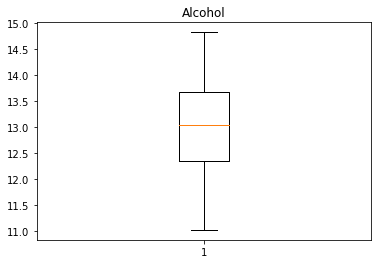

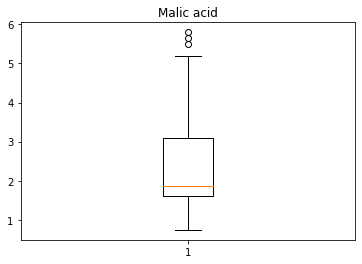

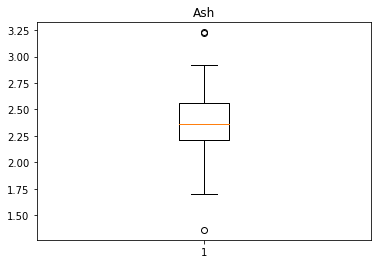

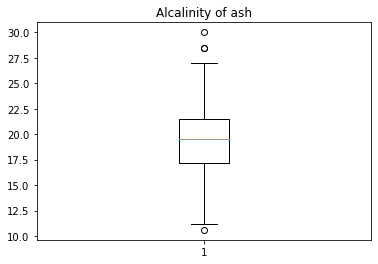

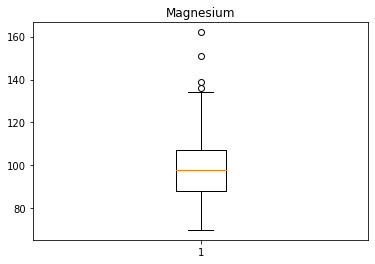

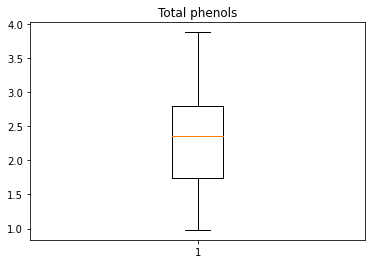

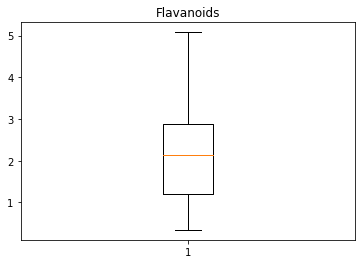

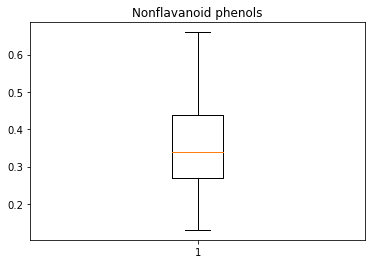

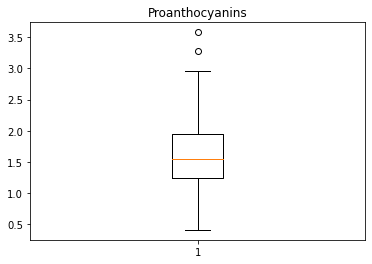

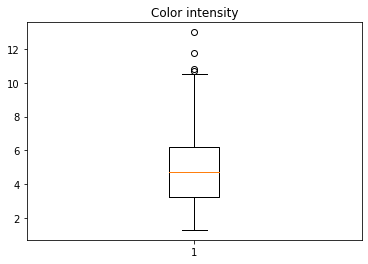

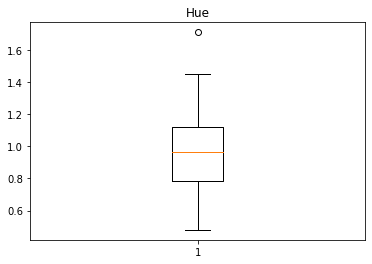

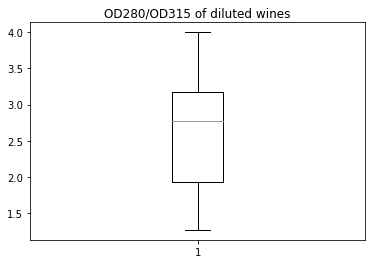

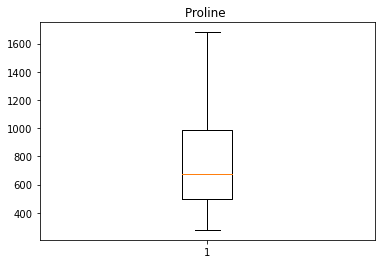

In [8]:
#visualisation of distribution of numeric variables
i =0
for col in numeric_columns:
    i = i+1
    plt.boxplot(wine[col])
    plt.title(col)
    plt.show()

In [9]:
wine.corr().Class.abs().sort_values(ascending=False)

Class                           1.000000
Flavanoids                      0.847498
OD280/OD315 of diluted wines    0.788230
Total phenols                   0.719163
Proline                         0.633717
Hue                             0.617369
Alcalinity of ash               0.517859
Proanthocyanins                 0.499130
Nonflavanoid phenols            0.489109
Malic acid                      0.437776
Alcohol                         0.328222
Color intensity                 0.265668
Magnesium                       0.209179
Ash                             0.049643
Name: Class, dtype: float64

In [10]:
#70-30 train test split
x = wine.drop('Class', axis=1)
y = wine['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [11]:
#scaling x and y
sc_x = StandardScaler()
x_trainscaled=sc_x.fit_transform(x_train)
x_testscaled=sc_x.transform(x_test)

In [19]:
# MLP classifier with 3 layers of 13 neurons and max 500 iterations
clf = MLPClassifier(hidden_layer_sizes=(13,13,13),activation="relu",max_iter=500).fit(x_trainscaled, y_train)
y_pred=clf.predict(x_testscaled)
print("MLP model score")
print(clf.score(x_testscaled, y_test))

MLP model score
0.9814814814814815


[Text(0.5, 1.0, 'Confusion Matrix')]

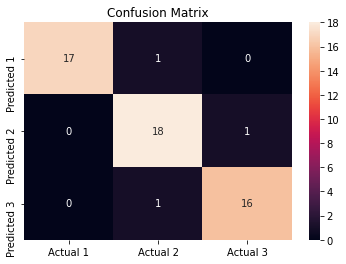

In [13]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=["Actual 1", "Actual 2", "Actual 3"], yticklabels=["Predicted 1", "Predicted 2", "Predicted 3"]).set(title='Confusion Matrix')

In [14]:
# model scores
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]

acc = (tp+tn)/(tp+tn+fp+fn)
tpr = tp/(fn+tp)
tnr = tn/(tn+fp)
precision = tp/(tp+fp)
F1 = 2 * (precision * tpr) / (precision + tpr)

print("Accuracy = ", acc)
print("Precision = ", precision)
print("Recall = ", tpr)
print("Specificity = ", tnr)
print("F1 Score = ", F1)

Accuracy =  0.9722222222222222
Precision =  0.9473684210526315
Recall =  1.0
Specificity =  0.9444444444444444
F1 Score =  0.972972972972973


In [17]:
# MLP weights
weights, bias = clf.coefs_, clf.intercepts_
print("Weights = ", weights)

Weights =  [array([[ 7.92316596e-02, -4.12573427e-01,  1.95410790e-01,
        -1.33625732e-01, -1.16610675e-01,  3.52350361e-01,
         7.65691352e-02, -3.48580030e-01, -4.02942143e-01,
         1.11956164e-01, -6.00147049e-01,  4.45040242e-02,
         3.75419747e-01],
       [ 1.37381140e-01, -2.49583612e-01, -4.37424834e-01,
         1.25420656e-02,  2.32466416e-01,  1.05971980e-01,
        -2.66112625e-02, -3.45522256e-01, -4.21269055e-01,
        -2.17631193e-01, -1.83174208e-01,  3.05001420e-01,
         2.22634770e-01],
       [-7.66781020e-03,  4.63278881e-02,  5.32346823e-01,
         1.02848184e-01, -2.44250831e-01, -2.58728087e-01,
         6.30376045e-02, -3.07057859e-01, -3.89393783e-01,
         2.43973948e-01, -4.82792816e-01,  3.10784105e-01,
         1.36079410e-01],
       [-2.12137276e-01,  5.44379965e-01, -2.14604698e-01,
         2.63736833e-01, -5.49866658e-01, -5.17028183e-01,
         2.40322178e-01, -4.34074964e-01, -3.52988557e-01,
         3.87273889e-01, 

In [18]:
#MLP biases
print("Bias = ", bias)

Bias =  [array([ 0.11720017, -0.22962424, -0.34105434,  0.39482454,  0.36176301,
       -0.03832223,  0.18967926,  0.43291134,  0.49982633, -0.30587584,
        0.57770328,  0.0617803 , -0.2080971 ]), array([-0.00130416,  0.12490562,  0.07994085,  0.05843161,  0.0672589 ,
       -0.26520789,  0.1179333 ,  0.18930199,  0.29862761,  0.28487464,
        0.60139168, -0.20186661, -0.226751  ]), array([-0.31979883, -0.07495054,  0.1461351 ,  0.37837289,  0.44650993,
        0.14565341, -0.30662366, -0.03787767,  0.05997874,  0.0553287 ,
        0.01157779,  0.02076095,  0.29284444]), array([-0.34492374,  0.32607116,  0.55666217])]
